# Cleaning and Analyzing the Bios

### Importing Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

### Loading the Data

In [2]:
with open("Data-Gathering-Creation\profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

In [3]:
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Evil communicator. Avid analyst. Freelance gamer. Beer specialist. Incurable troublemaker. Typical entrepreneur.,8,1,2,8,4,7,5
1,Alcohol lover. Evil analyst. Infuriatingly humble gamer. Future teen idol. Entrepreneur.,2,1,1,4,5,1,3
2,Amateur pop culture ninja. Social media expert. Future teen idol. Web lover. Travel advocate. Student. Music scholar.,8,2,0,8,7,8,1
3,Wannabe baconaholic. Music evangelist. Hardcore alcohol ninja. Social media fan.,7,3,8,6,2,4,1
4,Wannabe creator. Student. Social media enthusiast. Amateur gamer. Twitter ninja. Friendly problem solver. Devoted web guru.,2,9,2,2,8,8,8
...,...,...,...,...,...,...,...,...
6235,Freelance web aficionado. Coffee nerd. Twitter maven. Devoted pop culture guru. Tv scholar. Avid explorer.,5,8,8,0,8,0,0
6236,Bacon lover. Organizer. Subtly charming music advocate. Travel ninja. Passionate reader. Avid web fan. Extreme pop culture scholar.,9,2,2,8,2,3,2
6237,Unapologetic coffee advocate. Professional tv geek. Alcohol expert. Social media fan. Pop culture practitioner.,6,3,2,8,6,5,8
6238,Subtly charming pop culture aficionado. Social mediaholic. Bacon junkie. Wannabe twitter advocate. Friendly internet practitioner.,8,6,5,3,4,9,4


## Cleaning the Text

In [4]:
# Instantiating the lemmatizer
lemmatizer = WordNetLemmatizer()

In [5]:
def tokenize(text):
    """
    Tokenizing the bios, then lemmatizing them
    """
    # Creating a library of stopwords
    stops = set(stopwords.words('english'))
    
    # Lowercasing the words
    text = text.lower()
    
    # Removing the punctuations (periods)
    text = text.replace('.', '')
    
    # Splitting on spaces between words
    text = text.split(' ')
    
    # Lemmatizing the words and removing stop words
    text = [lemmatizer.lemmatize(i) for i in text if i not in stops]
    
    return text
    

In [6]:
df['Bios'] = df.Bios.apply(tokenize)

### Most Frequent Words

In [7]:
total_vocab = set()

for bio in df['Bios']:
    total_vocab.update(bio)
        
print("Number of unique words: ",len(total_vocab))

Number of unique words:  104


In [8]:
# Determining the most frequent words in user bios
words = []

for bio in df['Bios']:
    words.extend(bio)

bio_freq = FreqDist(words)
bio_freq.most_common(104)

[('fanatic', 2279),
 ('travel', 1785),
 ('twitter', 1639),
 ('food', 1594),
 ('web', 1593),
 ('beer', 1579),
 ('pop', 1575),
 ('social', 1565),
 ('music', 1563),
 ('culture', 1523),
 ('medium', 1507),
 ('bacon', 1494),
 ('internet', 1489),
 ('coffee', 1462),
 ('tv', 1460),
 ('alcohol', 1446),
 ('zombie', 1341),
 ('nerd', 1228),
 ('geek', 1222),
 ('fan', 1160),
 ('ninja', 1146),
 ('junkie', 1140),
 ('practitioner', 1116),
 ('evangelist', 1104),
 ('maven', 1097),
 ('expert', 1080),
 ('aficionado', 1077),
 ('guru', 1041),
 ('lover', 1040),
 ('buff', 1030),
 ('trailblazer', 1012),
 ('advocate', 993),
 ('gamer', 967),
 ('scholar', 962),
 ('organizer', 962),
 ('enthusiast', 948),
 ('creator', 917),
 ('friendly', 876),
 ('incurable', 875),
 ('communicator', 834),
 ('freelance', 834),
 ('student', 818),
 ('specialist', 800),
 ('thinker', 797),
 ('award-winning', 781),
 ('writer', 775),
 ('devoted', 745),
 ('subtly', 738),
 ('charming', 738),
 ('avid', 709),
 ('proud', 703),
 ('analyst', 701),


### Plotting the Most Frequent Words

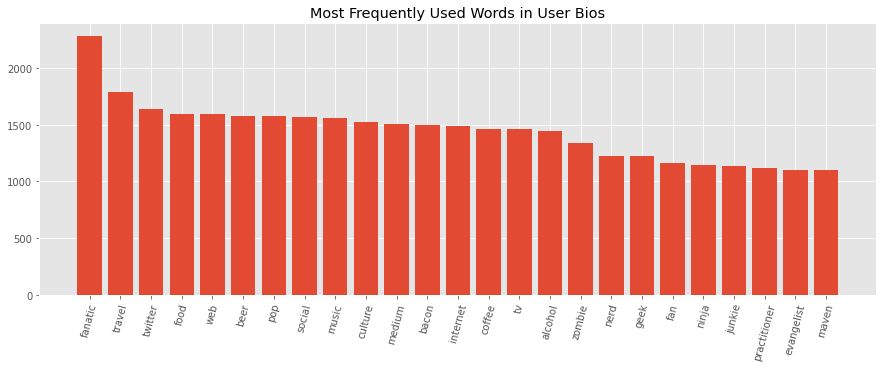

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.bar(*zip(*bio_freq.most_common(25)))
plt.xticks(rotation=75)
plt.title('Most Frequently Used Words in User Bios')
plt.show()

It would possibly be best to create some bigrams with this data as most of the words appear to be adjectives.

## Bigrams

In [10]:
# Instantiating the score of each bigram
bigram_meas = BigramAssocMeasures()

# Finding and ranking the Bigrams in each bio
bio_finder = BigramCollocationFinder.from_words(words)

# Finding the frequency scores of each bigram 
bio_scored = bio_finder.score_ngrams(bigram_meas.raw_freq)

In [11]:
# Top 50 most common bigrams
bio_scored[:50]

[(('pop', 'culture'), 0.019435936702399185),
 (('social', 'medium'), 0.019231750893312916),
 (('subtly', 'charming'), 0.009418070444104134),
 (('problem', 'solver'), 0.008754466564573762),
 (('infuriatingly', 'humble'), 0.0077335375191424196),
 (('internet', 'fanatic'), 0.003394589076059214),
 (('tv', 'fanatic'), 0.0032797345584481877),
 (('animal', 'everywhere'), 0.0030755487493619193),
 (('friend', 'animal'), 0.0030755487493619193),
 (('future', 'teen'), 0.0027692700357325167),
 (('teen', 'idol'), 0.0027692700357325167),
 (('coffee', 'junkie'), 0.002399183256763655),
 (('fall', 'lot'), 0.002399183256763655),
 (('twitter', 'fanatic'), 0.0023736600306278714),
 (('fit', 'apathy'), 0.002271567126084737),
 (('prone', 'fit'), 0.002271567126084737),
 (('web', 'fanatic'), 0.002258805513016845),
 (('travel', 'trailblazer'), 0.002105666156202144),
 (('music', 'fanatic'), 0.0020801429300663604),
 (('food', 'junkie'), 0.0020546197039305767),
 (('travel', 'fanatic'), 0.0020546197039305767),
 (('b

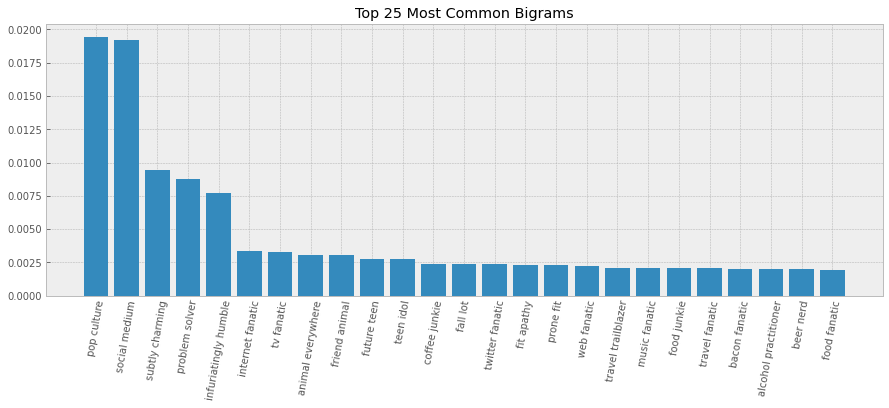

In [12]:
# Creating a list of the bigrams
bg = list(map(lambda x: x[0][0] + ' ' + x[0][1], bio_scored[:50]))

# Creating a list of the frequency scores
bio_scores = list(map(lambda x: x[1], bio_scored[:50]))

# Combining both the scores and the bigrams
bigrams = list(zip(bg, bio_scores))

# Plotting the bigrams and their frequency scores
plt.style.use('bmh')
plt.figure(figsize=(15,5))

plt.bar(*zip(*bigrams[:25]))
plt.xticks(rotation=80)
plt.title('Top 25 Most Common Bigrams')
plt.show()

In [13]:
# Filtering out bigrams based on frequency of occurence
bio_finder.apply_freq_filter(20)

# Calculating the pointwise mutual information score, which determines how often these words are associated with each other
bio_pmi = bio_finder.score_ngrams(bigram_meas.pmi)

In [14]:
bio_pmi

[(('boxing', 'glove'), 9.327092439592061),
 (('type', 'boxing'), 9.327092439592061),
 (('unable', 'type'), 9.327092439592061),
 (('fit', 'apathy'), 8.78209634618855),
 (('prone', 'fit'), 8.78209634618855),
 (('fall', 'lot'), 8.70324092547731),
 (('future', 'teen'), 8.496278544710469),
 (('teen', 'idol'), 8.496278544710469),
 (('animal', 'everywhere'), 8.344940440924988),
 (('friend', 'animal'), 8.344940440924988),
 (('infuriatingly', 'humble'), 7.014655793681996),
 (('problem', 'solver'), 6.835765010982136),
 (('subtly', 'charming'), 6.730352771094555),
 (('lot', 'unable'), 6.527391090077895),
 (('social', 'mediaholic'), 5.6458828353349695),
 (('social', 'medium'), 5.6458828353349695),
 (('pop', 'culture'), 5.636693663880308),
 (('pop', 'cultureaholic'), 5.636693663880308),
 (('glove', 'certified'), 4.7187055933595765),
 (('award-winning', 'alcoholaholic'), 4.127414135902203),
 (('junkie', 'unable'), 3.979629252597565),
 (('specialist', 'prone'), 3.8931276585772956),
 (('gamer', 'futur

### Creating Bigrams in the DF

In [15]:
# Creating bigrams for each pair of words in the bios
df['Bigrams'] = df.Bios.apply(lambda bio: BigramCollocationFinder.from_words(bio).nbest(bigram_meas.pmi, 100))

In [16]:
df[['Bios', 'Bigrams']]

,Bios,Bigrams
0,"[evil, communicator, avid, analyst, freelance, gamer, beer, specialist, incurable, troublemaker, typical, entrepreneur]","[(analyst, freelance), (avid, analyst), (beer, specialist), (communicator, avid), (evil, communicator), (freelance, gamer), (gamer, beer), (incurable, troublemaker), (specialist, incurable), (troublemaker, typical), (typical, entrepreneur)]"
1,"[alcohol, lover, evil, analyst, infuriatingly, humble, gamer, future, teen, idol, entrepreneur]","[(alcohol, lover), (analyst, infuriatingly), (evil, analyst), (future, teen), (gamer, future), (humble, gamer), (idol, entrepreneur), (infuriatingly, humble), (lover, evil), (teen, idol)]"
2,"[amateur, pop, culture, ninja, social, medium, expert, future, teen, idol, web, lover, travel, advocate, student, music, scholar]","[(advocate, student), (amateur, pop), (culture, ninja), (expert, future), (future, teen), (idol, web), (lover, travel), (medium, expert), (music, scholar), (ninja, social), (pop, culture), (social, medium), (student, music), (teen, idol), (travel, advocate), (web, lover)]"
3,"[wannabe, baconaholic, music, evangelist, hardcore, alcohol, ninja, social, medium, fan]","[(alcohol, ninja), (baconaholic, music), (evangelist, hardcore), (hardcore, alcohol), (medium, fan), (music, evangelist), (ninja, social), (social, medium), (wannabe, baconaholic)]"
4,"[wannabe, creator, student, social, medium, enthusiast, amateur, gamer, twitter, ninja, friendly, problem, solver, devoted, web, guru]","[(amateur, gamer), (creator, student), (devoted, web), (enthusiast, amateur), (friendly, problem), (gamer, twitter), (medium, enthusiast), (ninja, friendly), (problem, solver), (social, medium), (solver, devoted), (student, social), (twitter, ninja), (wannabe, creator), (web, guru)]"
...,...,...
6235,"[freelance, web, aficionado, coffee, nerd, twitter, maven, devoted, pop, culture, guru, tv, scholar, avid, explorer]","[(aficionado, coffee), (avid, explorer), (coffee, nerd), (culture, guru), (devoted, pop), (freelance, web), (guru, tv), (maven, devoted), (nerd, twitter), (pop, culture), (scholar, avid), (tv, scholar), (twitter, maven), (web, aficionado)]"
6236,"[bacon, lover, organizer, subtly, charming, music, advocate, travel, ninja, passionate, reader, avid, web, fan, extreme, pop, culture, scholar]","[(advocate, travel), (avid, web), (bacon, lover), (charming, music), (culture, scholar), (extreme, pop), (fan, extreme), (lover, organizer), (music, advocate), (ninja, passionate), (organizer, subtly), (passionate, reader), (pop, culture), (reader, avid), (subtly, charming), (travel, ninja), (web, fan)]"
6237,"[unapologetic, coffee, advocate, professional, tv, geek, alcohol, expert, social, medium, fan, pop, culture, practitioner]","[(advocate, professional), (alcohol, expert), (coffee, advocate), (culture, practitioner), (expert, social), (fan, pop), (geek, alcohol), (medium, fan), (pop, culture), (professional, tv), (social, medium), (tv, geek), (unapologetic, coffee)]"
6238,"[subtly, charming, pop, culture, aficionado, social, mediaholic, bacon, junkie, wannabe, twitter, advocate, friendly, internet, practitioner]","[(advocate, friendly), (aficionado, social), (bacon, junkie), (charming, pop), (culture, aficionado), (friendly, internet), (internet, practitioner), (junkie, wannabe), (mediaholic, bacon), (pop, culture), (social, mediaholic), (subtly, charming), (twitter, advocate), (wannabe, twitter)]"


## Exporting the Data

In [17]:
# Pickling the tokenized words and bigrams
with open("clean_bigram_df.pkl", "wb") as fp:
    pickle.dump(df, fp)